In [23]:
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
df = pd.read_csv("train.csv")
df.drop("Id",axis=1,inplace=True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [25]:
def handling_nan(df):
    nulls = df.columns[np.where(df.isnull().sum()!=0)[0]].tolist()
    dic = {}
    for i in nulls:
        dic[i] = df[i].isna().sum()
        if(dic[i]>1000):
            df.drop(i, inplace=True, axis=1)
            del dic[i]


    for i in dic:
        if(pd.api.types.is_numeric_dtype(df[i])):
            plt.hist(df[i])
            plt.show()   # this shows that the data is skewed which means, median will be more suitable than mean for filling NaN values


    for i in dic.keys():
        if(pd.api.types.is_numeric_dtype(df[i])):
            df[i].fillna(df[i].median(),inplace=True)
        else:
            df[i].fillna(df[i].mode()[0],inplace=True)

    nulls = df.columns[np.where(df.isnull().sum()!=0)[0]].tolist()
    print("NaN cases remaining : ", nulls)
    return df



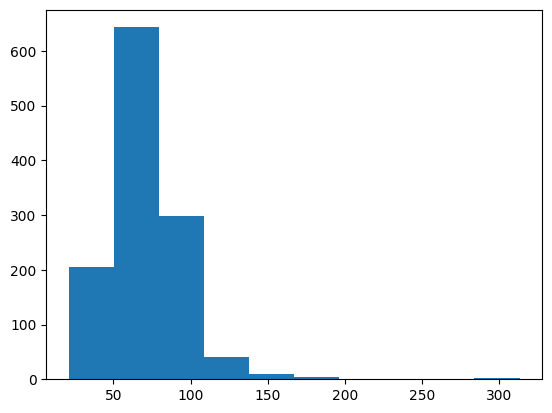

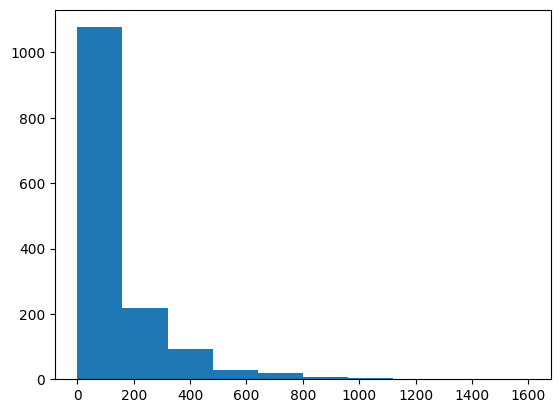

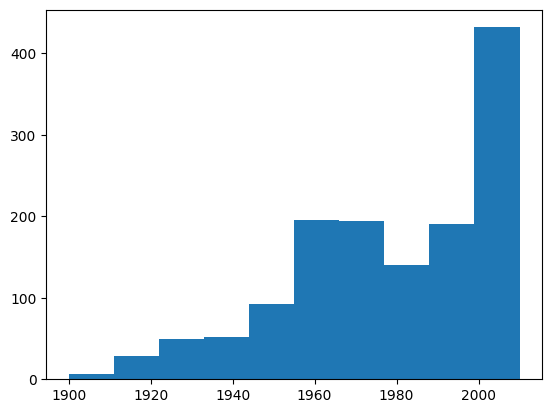

NaN cases remaining :  []


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [26]:
df = handling_nan(df)
df

In [27]:
def transformation(df, encoder=None):
    if(encoder):
        le = encoder
    else:
        le = LabelEncoder()
    for i in df.columns:
        df[i] = le.fit_transform(df[i])
    return df, le
    

In [28]:
y = df.iloc[:,-1]
df=df.iloc[:,:-1]
df, encoder = transformation(df)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,36,327,1,3,3,0,4,0,...,49,0,0,0,0,0,1,2,8,4
1,0,3,51,498,1,3,3,0,2,0,...,0,0,0,0,0,0,4,1,8,4
2,5,3,39,702,1,0,3,0,4,0,...,30,0,0,0,0,0,8,2,8,4
3,6,3,31,489,1,0,3,0,0,0,...,24,108,0,0,0,0,1,0,8,0
4,5,3,55,925,1,0,3,0,2,0,...,70,0,0,0,0,0,11,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,33,267,1,3,3,0,4,0,...,28,0,0,0,0,0,7,1,8,4
1456,0,3,56,866,1,3,3,0,4,0,...,0,0,0,0,0,0,1,4,8,4
1457,6,3,37,415,1,3,3,0,4,0,...,48,0,0,0,0,17,4,4,8,4
1458,0,3,39,505,1,3,3,0,4,0,...,0,38,0,0,0,0,3,4,8,4


In [29]:
x_train, x_test, y_train, y_test = train_test_split(df, y, random_state=2002)


In [30]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)


RandomForestRegressor()

In [31]:
y_pred = rf.predict(x_test)
print("mean_abs_error: ", mean_absolute_error(y_test, y_pred))
print("mean_squared_error: ", mean_squared_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test, y_pred))



mean_abs_error:  16347.461506849315
mean_squared_error:  684561729.8565295
r2 score:  0.9038228433557199


In [32]:
df2 = pd.read_csv("test.csv")
id = df2.Id
df2.drop("Id", axis=1, inplace=True)
df2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [33]:
for i in df2.columns:
    if(i not in df.columns):
        df2.drop(i,axis=1,inplace=True)

for i in df2.columns:
        if(pd.api.types.is_numeric_dtype(df2[i])):
            df2[i].fillna(df2[i].median(),inplace=True)
        else:
            df2[i].fillna(df2[i].mode()[0],inplace=True)

In [34]:

df2,encoder = transformation(df2, encoder)
df2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,2,56,777,1,3,3,0,4,0,...,0,0,0,18,0,0,5,4,8,4
1,0,3,57,964,1,0,3,0,0,0,...,24,0,0,0,0,24,5,4,8,4
2,5,3,50,947,1,0,3,0,4,0,...,22,0,0,0,0,0,2,4,8,4
3,5,3,54,587,1,0,3,0,4,0,...,24,0,0,0,0,0,5,4,8,4
4,11,3,19,118,1,0,1,0,4,0,...,68,0,0,27,0,0,0,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,13,4,0,19,1,3,3,0,4,0,...,0,0,0,0,0,0,5,0,8,4
1455,13,4,0,17,1,3,3,0,4,0,...,12,0,0,0,0,0,3,0,8,0
1456,0,3,112,1069,1,3,3,0,4,0,...,0,0,0,0,0,0,8,0,8,0
1457,9,3,38,647,1,3,3,0,4,0,...,20,0,0,0,0,12,6,0,8,4


In [35]:
df2 = df2.reindex(columns=x_train.columns, fill_value=0)
final_pred = rf.predict(df2)
final_pred

array([126037.53, 157636.16, 182064.59, ..., 149133.02, 120141.75,
       253814.8 ])

In [36]:
predictions = pd.DataFrame({"Id":id,"SalePrice":final_pred})

In [37]:
predictions.to_csv("pred_values.csv",index=False)